## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import pickle

# Libraries to cluster data
from sklearn.cluster import KMeans

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.cm as cm
from cluster_visualization_helper import (
    visualize_cluster)  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
RESULT_DIR = BASE_DIR + "RESULTS/"

SEED = 6886
%matplotlib inline

## Import data

In [63]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
# Load clean job title dataset from file
title_docs = pd.read_csv(
    OUTPUT_DIR + "clean_title_df.csv",
    converters={
        "job_title_token": ast.literal_eval,
    },
    dtype={
        "job_id": int,
        "job_title": str,
        "job_title_lemma": str,
    }
)

In [4]:
title_embeddings.shape, title_docs.shape

((18992, 300), (18992, 4))

In [64]:
title_docs

,job_id,job_title,job_title_lemma,job_title_token
0,1,Chief Financial Officer,chief financial officer,"[chief, financial, officer]"
1,2,Full-time Community Connections Intern (paid i...,time community connection intern pay internship,"[time, community, connection, intern, pay, int..."
2,3,Country Coordinator,country coordinator,"[country, coordinator]"
3,4,BCC Specialist,bcc specialist,"[bcc, specialist]"
4,5,Software Developer,software developer,"[software, developer]"
...,...,...,...,...
18987,18997,Senior Creative UX/ UI Designer,senior creative ux ui designer,"[senior, creative, ux, ui, designer]"
18988,18998,Category Development Manager,category development manager,"[category, development, manager]"
18989,18999,Operational Marketing Manager,operational marketing manager,"[operational, marketing, manager]"
18990,19000,Head of Online Sales Department,head online sale department,"[head, online, sale, department]"


## Clustering data

### K-means

In [6]:
def kmeans_clusterer(X, k, seed=SEED):
    """Generate clusters and print Silhouette metrics using Kmeans

    Args:
        X: Matrix of features
        k: Number of clusters
        seed: Seed number to ensure reproducibility

    Returns:
        Trained clustering model based on X.
    """

    km = KMeans(n_clusters=k, random_state=seed).fit(X)

    return km

In [11]:
# Define search space for tuning hyperparameters
X = title_embeddings
tuning_result = {
    "n_clusters": [],
    "duration": [],
    "n_iters": [],
}
# duration_list = []
model_list = []
label_list = []
# k_range = list(range(2, 301))
k_range = list(range(5, 25, 5))
k_range.extend(list(range(25, 110, 25)))
k_range.extend([150, 200, 250, 300])
len(k_range), k_range

(12, [5, 10, 15, 20, 25, 50, 75, 100, 150, 200, 250, 300])

In [12]:
# Tuning hyperparameter
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for k in tqdm(k_range):
    # Train model
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer = kmeans_clusterer(
        X,
        k,
        SEED
    )

    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    # Save model
    pickle.dump(
        clusterer,
        open(
            OUTPUT_DIR
            + "kmeans/"
            + "title_kmeans_model_k-"
            + str(k)
            + ".pkl",
            "wb",
        ),
    )

    # Write result into list
    model_list.append(clusterer)
    label_list.append(clusterer.labels_)
    tuning_result['n_clusters'].append(k)
    tuning_result['n_iters'].append(clusterer.n_iter_)
    tuning_result['duration'].append(round((endtime - starttime).seconds/60, 4))

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

Start loop 2021-05-17 15:31:35.005505
Start 2021-05-17 15:31:35.006507


  8%|██████▉                                                                            | 1/12 [00:01<00:21,  1.96s/it]

End 2021-05-17 15:31:36.962504
Duration 0:00:01.955997
Start 2021-05-17 15:31:36.966505


 17%|█████████████▊                                                                     | 2/12 [00:04<00:25,  2.54s/it]

End 2021-05-17 15:31:39.912504
Duration 0:00:02.945999
Start 2021-05-17 15:31:39.914506


 25%|████████████████████▊                                                              | 3/12 [00:09<00:29,  3.28s/it]

End 2021-05-17 15:31:44.061505
Duration 0:00:04.146999
Start 2021-05-17 15:31:44.063506


 33%|███████████████████████████▋                                                       | 4/12 [00:14<00:33,  4.14s/it]

End 2021-05-17 15:31:49.515504
Duration 0:00:05.451998
Start 2021-05-17 15:31:49.517507


 42%|██████████████████████████████████▌                                                | 5/12 [00:21<00:35,  5.01s/it]

End 2021-05-17 15:31:56.077505
Duration 0:00:06.559998
Start 2021-05-17 15:31:56.080505


 50%|█████████████████████████████████████████▌                                         | 6/12 [00:33<00:44,  7.43s/it]

End 2021-05-17 15:32:08.195505
Duration 0:00:12.115000
Start 2021-05-17 15:32:08.199506


 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:50<00:53, 10.65s/it]

End 2021-05-17 15:32:25.479504
Duration 0:00:17.279998
Start 2021-05-17 15:32:25.483507


 67%|███████████████████████████████████████████████████████▎                           | 8/12 [01:13<00:58, 14.58s/it]

End 2021-05-17 15:32:48.465505
Duration 0:00:22.981998
Start 2021-05-17 15:32:48.490506


 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [01:49<01:03, 21.21s/it]

End 2021-05-17 15:33:24.272505
Duration 0:00:35.781999
Start 2021-05-17 15:33:24.275505


 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [02:37<00:58, 29.47s/it]

End 2021-05-17 15:34:12.225505
Duration 0:00:47.950000
Start 2021-05-17 15:34:12.229505


 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [03:35<00:38, 38.32s/it]

End 2021-05-17 15:35:10.631508
Duration 0:00:58.402003
Start 2021-05-17 15:35:10.636506


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:46<00:00, 23.86s/it]

End 2021-05-17 15:36:21.346834
Duration 0:01:10.710328
End loop 2021-05-17 15:36:21.352834
Duration 0:04:46.347329


In [14]:
tuning_result["inertia"] = []
tuning_result["inertia_error"] = []

tqdm_bar = tqdm(desc="Computing inertia", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        inertia = model_list[i].inertia_
        tuning_result["inertia_error"].append("None")
    except Exception as e:
        print(e)
        inertia = -1.1
        tuning_result["inertia_error"].append(e)
    tuning_result["inertia"].append(inertia)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing inertia: 100%|████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 12015.19it/s]


In [15]:
tuning_result["silhouette"] = []
tuning_result["silhouette_error"] = []

tqdm_bar = tqdm(desc="Computing Silhouette score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        silhouette = metrics.silhouette_score(
            X, label_list[i], sample_size=10000, random_state=SEED, n_jobs=-1
        )
        tuning_result["silhouette_error"].append("None")
    except Exception as e:
        print(e)
        silhouette = -1.1
        tuning_result["silhouette_error"].append(e)
    tuning_result["silhouette"].append(silhouette)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Silhouette score: 100%|██████████████████████████████████████████████████████| 12/12 [00:37<00:00,  3.16s/it]


In [16]:
tuning_result["calinski_harabasz"] = []
tuning_result["calinski_harabasz_error"] = []

tqdm_bar = tqdm(desc="Computing Calinski Harabasz score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        calinski_harabasz = metrics.calinski_harabasz_score(X, label_list[i])
        tuning_result["calinski_harabasz_error"].append("None")
    except Exception as e:
        print(e)
        calinski_harabasz = -1.1
        tuning_result["calinski_harabasz_error"].append(e)
    tuning_result["calinski_harabasz"].append(calinski_harabasz)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Calinski Harabasz score: 100%|███████████████████████████████████████████████| 12/12 [00:00<00:00, 16.57it/s]


In [17]:
tuning_result["davies_bouldin"] = []
tuning_result["davies_bouldin_error"] = []

tqdm_bar = tqdm(desc="Computing Davies Bouldin score", total=len(model_list))
for i, _ in enumerate(model_list):
    try:
        davies_bouldin = metrics.davies_bouldin_score(X, label_list[i])
        tuning_result["davies_bouldin_error"].append("None")
    except Exception as e:
        print(e)
        davies_bouldin = -1.1
        tuning_result["davies_bouldin_error"].append(e)
    tuning_result["davies_bouldin"].append(davies_bouldin)
    tqdm_bar.update(1)
tqdm_bar.close()

Computing Davies Bouldin score: 100%|██████████████████████████████████████████████████| 12/12 [00:00<00:00, 13.38it/s]


In [18]:
# Display tuning results
tuning_result_df = pd.DataFrame(tuning_result)
tuning_result_df

,n_clusters,duration,n_iters,inertia,inertia_error,silhouette,silhouette_error,calinski_harabasz,calinski_harabasz_error,davies_bouldin,davies_bouldin_error
0,5,0.02,12,230663.843258,None,0.089126,None,1164.666669,None,2.782530,None
1,10,0.03,55,203531.961723,None,0.103593,None,867.633512,None,2.565035,None
2,15,0.07,20,184314.974345,None,0.127714,None,757.082308,None,2.331552,None
3,20,0.08,39,170990.970295,None,0.136121,None,678.968069,None,2.194650,None
4,25,0.10,29,159977.552081,None,0.150476,None,628.775958,None,2.179920,None
5,50,0.20,43,134228.008866,None,0.175223,None,440.725365,None,2.082857,None
6,75,0.28,44,119138.323243,None,0.198036,None,360.738136,None,2.033978,None
7,100,0.37,22,109412.968052,None,0.214520,None,310.184354,None,2.045752,None
8,150,0.58,36,97330.362771,None,0.247692,None,246.765529,None,1.891670,None
9,200,0.78,40,88359.355785,None,0.272232,None,212.570488,None,1.883568,None


In [19]:
# Save tuning results
tuning_result_df.to_csv(
    RESULT_DIR + "kmeans/" + "title_kmeans_tuning_result.csv", index=False
)

In [20]:
# Combine model sets
tuple_objects = (
    model_list,
    label_list,
    tuning_result,
)
len(tuple_objects), len(tuple_objects[0])

(3, 12)

In [21]:
# Save tuple of model sets
pickle.dump(
    tuple_objects, open(RESULT_DIR + "kmeans/" + "title_model_tuning_list.pkl", "wb")
)

## Evaluate cluster performance

#### Inertia

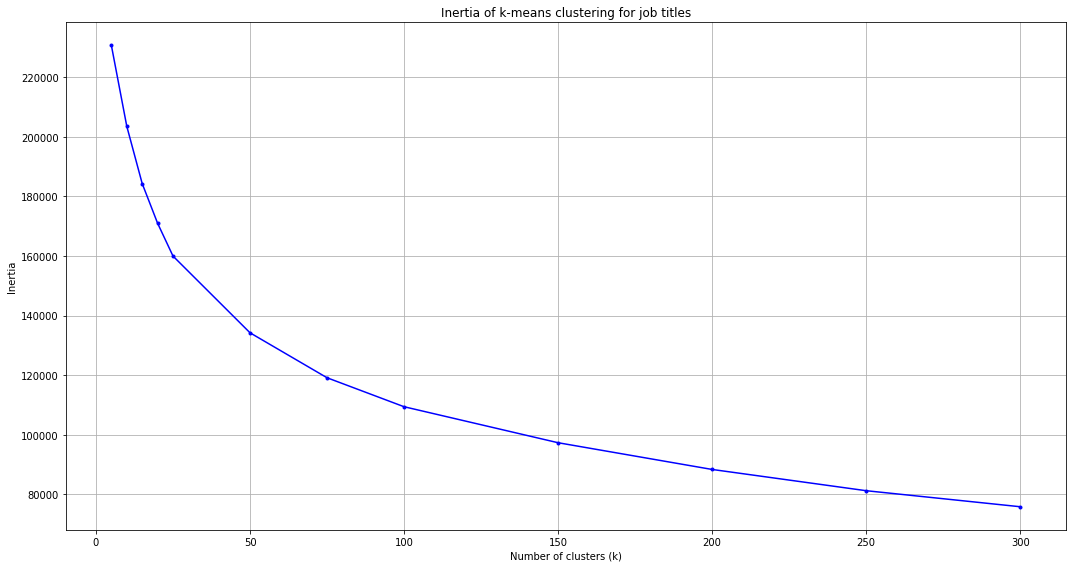

In [45]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["inertia"], "b.-")
plt.title("Inertia of k-means clustering for job titles")
plt.xlabel("Number of clusters (k)")
# plt.xticks(np.unique(tuning_result["n_clusters"]))
plt.ylabel("Inertia")
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "title_kmeans_inertia_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Display plot
plt.show()

#### Silhoulette score

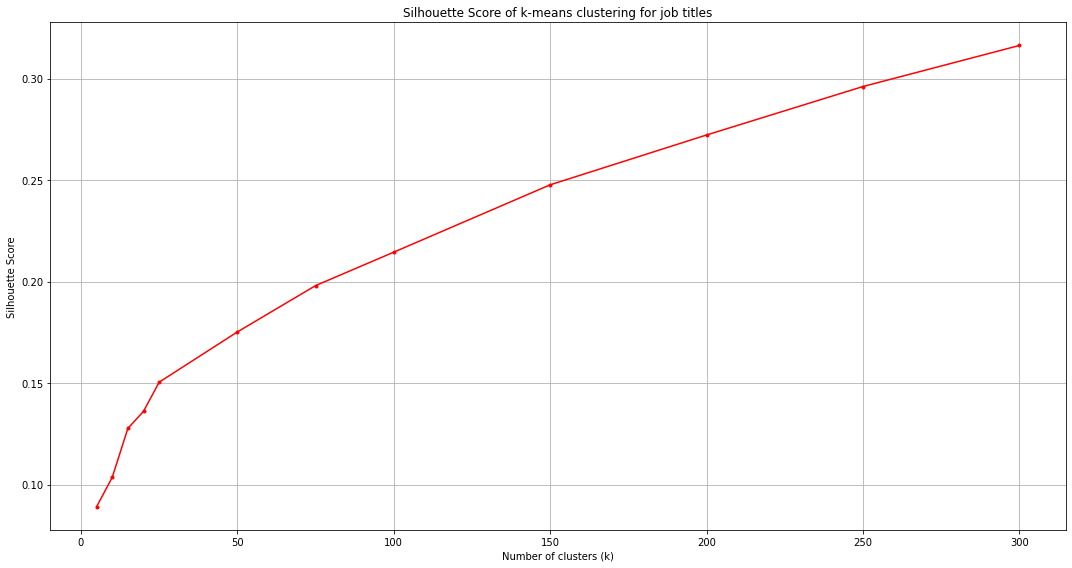

In [46]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["silhouette"], "r.-")
plt.title("Silhouette Score of k-means clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Silhouette Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "title_kmeans_silhouette_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Calinski Harabasz Score

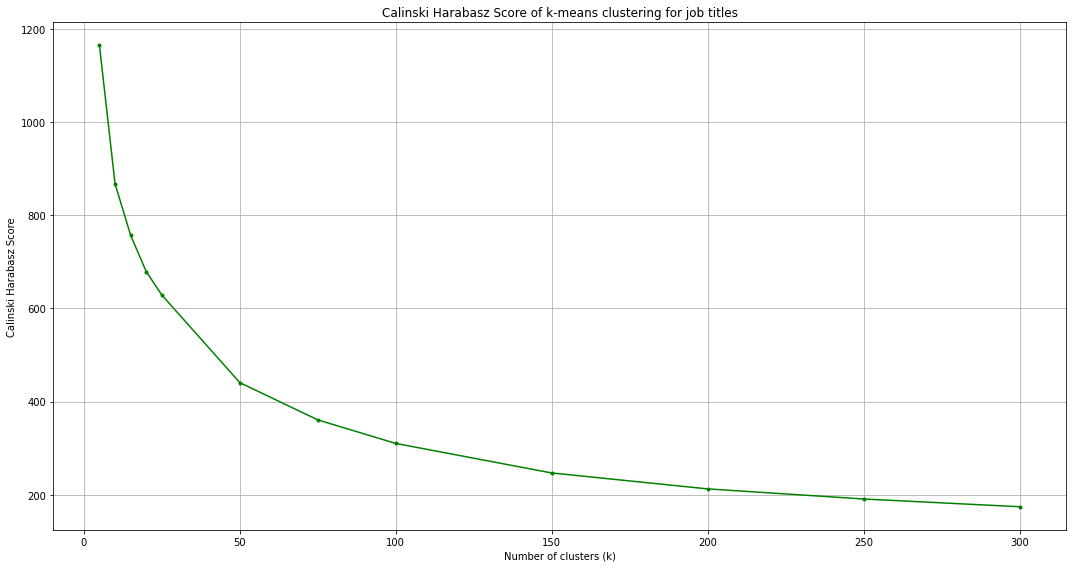

In [47]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["calinski_harabasz"], "g.-")
plt.title("Calinski Harabasz Score of k-means clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Calinski Harabasz Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "title_kmeans_calinski_harabasz_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

#### Davies-Bouldin Score

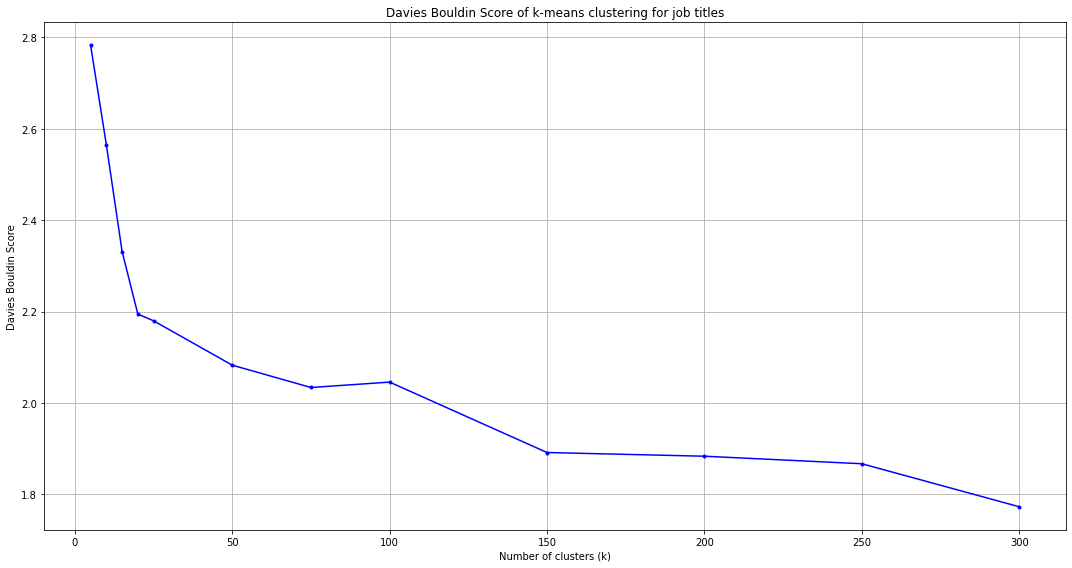

In [48]:
# Create plot
fig = plt.figure(figsize=(15, 8))
plt.plot(k_range, tuning_result["davies_bouldin"], "b.-")
plt.title("Davies Bouldin Score of k-means clustering for job titles")
plt.xlabel('Number of clusters (k)')
# plt.xticks(np.unique(tuning_result['n_clusters']))
plt.ylabel('Davies Bouldin Score')
plt.grid()
plt.tight_layout()

# Saving plot as image
fig.savefig(
    RESULT_DIR + "kmeans/" + "title_kmeans_davies_bouldin_plot.png",
#     bbox_inches="tight",
#     dpi=150,
)

# Show plot
plt.show()

## Visualize clusters

In [76]:
# best_index = np.argmax(tuning_result['silhouette'])
best_index = int(np.where(np.array(tuning_result['n_clusters']) == 25)[0])
print('Index of best model =', best_index)

best_k = tuning_result['n_clusters'][best_index]
print(f'Optimal number of clusters (k) = {best_k}')

best_labels = label_list[best_index]

Index of best model = 4
Optimal number of clusters (k) = 25


In [77]:
pca_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_pca_datapoints.npy")
umap_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_umap_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "visualization/" + "title_tsne_datapoints.npy")

Start PCA 2021-05-17 17:19:47.048560
End PCA 2021-05-17 17:19:47.071563
PCA duration 0:00:00.023003

Start t-SNE 2021-05-17 17:19:47.071563
End t-SNE 2021-05-17 17:19:47.079562
t-SNE duration 0:00:00.007999

Start UMAP 2021-05-17 17:19:47.079562
End UMAP 2021-05-17 17:19:47.089564
UMAP duration 0:00:00.010002



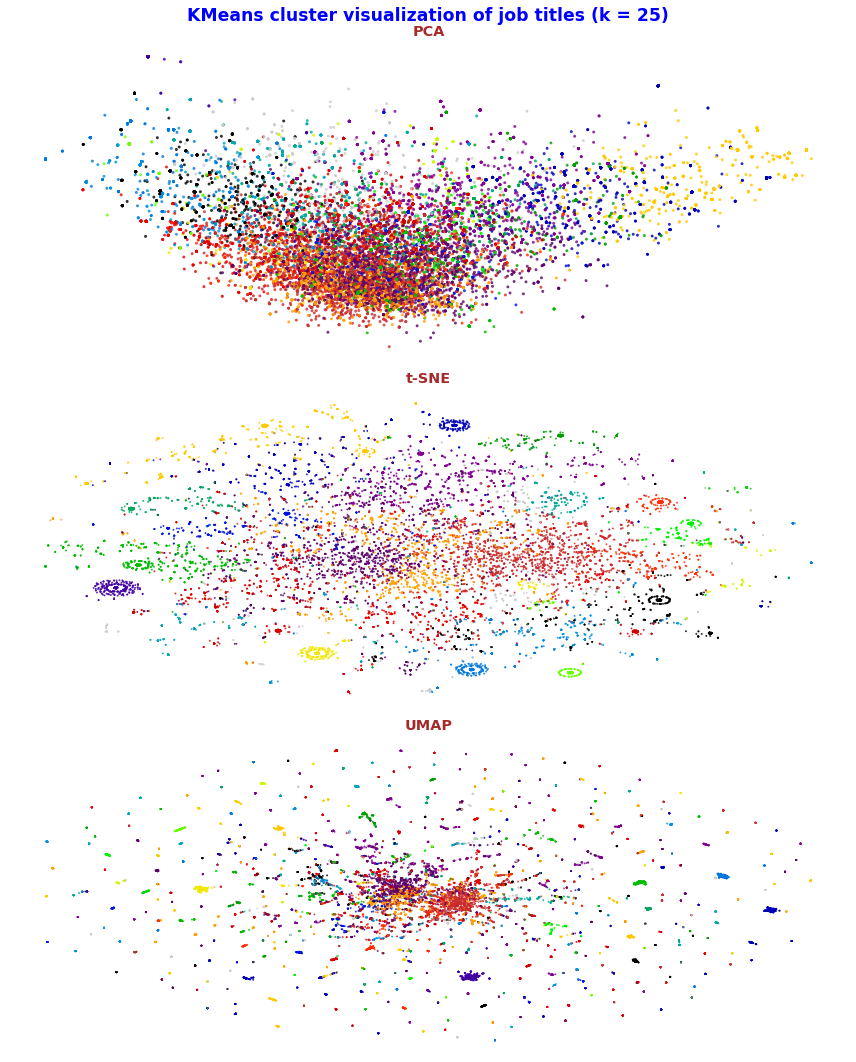

In [78]:
plot_title = f"KMeans cluster visualization of job titles (k = {best_k})"
plot_filename = (
    RESULT_DIR + "kmeans/" + "title_kmeans_optimal-cluster-visualization.png"
)
palette = sns.color_palette("nipy_spectral", as_cmap=True)
# colors = cm.nipy_spectral(best_labels.astype(float) / best_k)
colors = best_labels

# Visualize clusters with PCA, UMAP, and t-SNE
visualize_cluster(
    plot_title,
    (12, 15),
    colors,
    palette,
    4,
    pca_datapoint,
    tsne_datapoint,
    umap_datapoint,
    pca=True,
    tsne=True,
    compute_umap=True,
    save_plots=True,
    plot_file=plot_filename,
)

## Display top words of each cluster

In [79]:
df_clusters = title_docs.copy(deep=True)
df_clusters["model_type"] = "kmeans"
df_clusters["title_n_clusters"] = best_k
# df_clusters["embeddings"] = "job_title"
df_clusters['title_cluster_label'] = best_labels
df_clusters

,job_id,job_title,job_title_lemma,job_title_token,model_type,title_n_clusters,title_cluster_label
0,1,Chief Financial Officer,chief financial officer,"[chief, financial, officer]",kmeans,25,21
1,2,Full-time Community Connections Intern (paid i...,time community connection intern pay internship,"[time, community, connection, intern, pay, int...",kmeans,25,23
2,3,Country Coordinator,country coordinator,"[country, coordinator]",kmeans,25,23
3,4,BCC Specialist,bcc specialist,"[bcc, specialist]",kmeans,25,19
4,5,Software Developer,software developer,"[software, developer]",kmeans,25,4
...,...,...,...,...,...,...,...
18987,18997,Senior Creative UX/ UI Designer,senior creative ux ui designer,"[senior, creative, ux, ui, designer]",kmeans,25,11
18988,18998,Category Development Manager,category development manager,"[category, development, manager]",kmeans,25,22
18989,18999,Operational Marketing Manager,operational marketing manager,"[operational, marketing, manager]",kmeans,25,5
18990,19000,Head of Online Sales Department,head online sale department,"[head, online, sale, department]",kmeans,25,12


In [80]:
wordcount = {}
sorted_wordcount = {}
for i in range(best_k):
    titles = df_clusters[df_clusters['title_cluster_label'] == i]["job_title_lemma"].values
    titles = ' '.join(' '.join(titles).split())
    wordcount[i] = {}
    for j in titles.split():
        if j in wordcount[i]: 
            wordcount[i][j] += 1
        else:
            wordcount[i][j] = 1
    sorted_wordcount[i] = sorted(wordcount[i].items(), key=lambda x: x[1], reverse=True)

In [82]:
topwords = {}
for key, i in sorted_wordcount.items():
    print("Cluster "+str(key)+": ", end='')
    topwords[key] = ''
    for newkey, j in sorted_wordcount[key][:10]:
        print(newkey + '|', end='')
        topwords[key] = topwords[key] + newkey + '|'
    print()

Cluster 0: assistant|administrative|receptionist|department|secretary|office|manager|accounting|intern|finance|
Cluster 1: head|department|service|specialist|manager|division|unit|engineer|internal|customer|
Cluster 2: engineer|software|senior|qa|design|quality|assurance|department|intern|contractor|
Cluster 3: accountant|outsource|bookkeeper|financier|auditor|bank|stepanavan|administrator|
Cluster 4: developer|software|senior|java|programmer|net|web|database|architect|engineer|
Cluster 5: marketing|specialist|manager|consultant|advertising|business|pr|assistant|department|coordinator|
Cluster 6: chief|accountant|senior|deputy|secretary|auditor|executive|officer|assistant|party|
Cluster 7: director|executive|assistant|deputy|journalist|finance|commercial|financial|general|editor|
Cluster 8: cashier|receptionist|teller|salesperson|branch|waiter|waitress|accountant|operator|clerk|
Cluster 9: analyst|financial|economist|senior|business|credit|system|research|finance|market|
Cluster 10: ad

## Save cluster results to file

In [83]:
df_clusters.to_csv(
    RESULT_DIR + "kmeans/" + "title_kmeans_optimal-cluster-labels.csv", index=False
)

In [84]:
# Save tuple of model sets
pickle.dump(
    (sorted_wordcount, topwords), open(RESULT_DIR + "kmeans/" + "title_kmeans_optimal-topwords.pkl", "wb")
)